<a href="https://colab.research.google.com/github/Amorganblue/CSC302-midterm/blob/main/midterm_notebook_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

AvgIQ = pd.read_csv('/content/drive/MyDrive/IQ_level.csv')

missing_data = AvgIQ[['avg_income', 'IQ']].isnull().sum()
print(missing_data)

avg_income    2
IQ            0
dtype: int64


In [ ]:
print(AvgIQ.head)

<bound method NDFrame.head of      rank            country   IQ  education_expenditure  avg_income  avg_temp
0       1         Hong Kong   106                 1283.0     35304.0      26.2
1       2              Japan  106                 1340.0     40964.0      19.2
2       3          Singapore  106                 1428.0     41100.0      31.5
3       4            Taiwan   106                    NaN         NaN      26.9
4       5              China  104                  183.0      4654.0      19.1
..    ...                ...  ...                    ...         ...       ...
103   104  Equatorial Guinea   56                    NaN      7625.0      29.9
104   105             Gambia   55                   14.0       648.0      32.9
105   106          Guatemala   55                   92.0      2830.0      32.1
106   107       Sierra Leone   52                   16.0       412.0      30.4
107   108              Nepal   51                   22.0       595.0      24.6

[108 rows x 6 columns

In [ ]:
AvgIQ = AvgIQ.dropna(subset=['avg_income', 'IQ'])

# Create a scatter plot to demonstrate correlation IQ vs Average Income

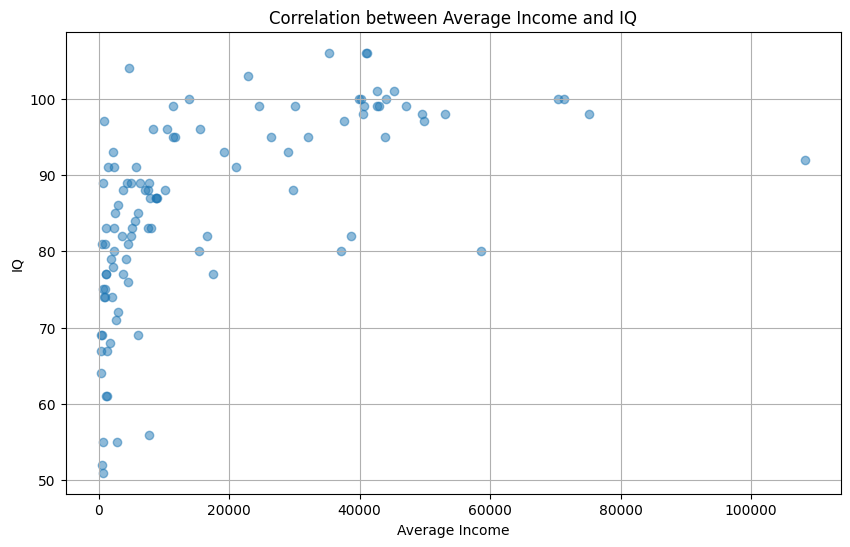

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(AvgIQ['avg_income'], AvgIQ['IQ'], alpha=0.5)
plt.title('Correlation between Average Income and IQ')
plt.xlabel('Average Income')
plt.ylabel('IQ')
plt.grid(True)
plt.show()

Turns out we all did scatter plots, so needed to output this data in a different type of visualization.

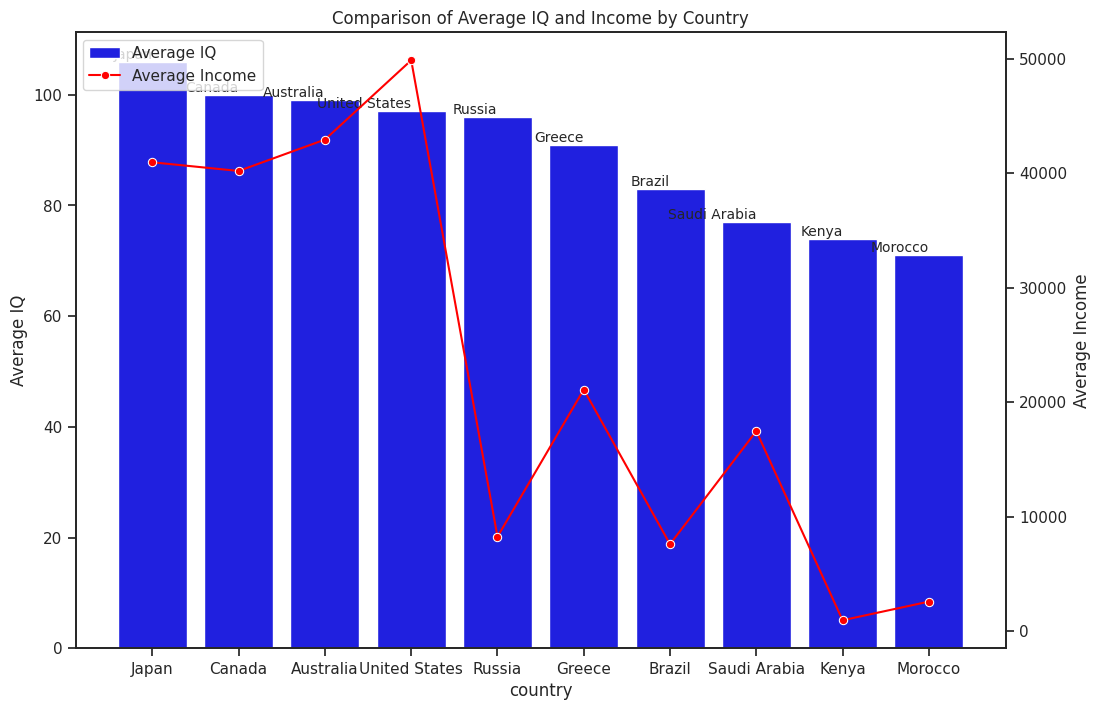

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of countries for labeling
countries_to_label = ['Japan', 'United States', 'Russia',
                      'Australia', 'Brazil', 'Saudi Arabia',
                      'Greece', 'Kenya', 'Morocco', 'Canada']

# filter the data for the selected countries
selected_countries = AvgIQ[AvgIQ['country'].isin(countries_to_label)]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for Average IQ on the primary y-axis
sns.barplot(data=selected_countries, x='country', y='IQ', color='blue',
            label='Average IQ', ax=ax1)

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()
sns.lineplot(data=selected_countries, x='country', y='avg_income', marker='o', color='red', label='Average Income', ax=ax2)

# Annotate the selected countries
for i, country in enumerate(selected_countries['country']):
    ax1.annotate(country, (i, selected_countries['IQ'].iloc[i]), fontsize=10, ha='right', va='bottom')

# Set labels and legend
ax1.set_ylabel('Average IQ')
ax2.set_ylabel('Average Income')
plt.title('Comparison of Average IQ and Income by Country')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [ ]:
# Calculate correlation coefficient between 'avg_income' and 'IQ'
correlation = AvgIQ['avg_income'].corr(AvgIQ['IQ'])
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.57


I am going to try to group all the countries according to continent, to avoid an ugly, crowded visual... and also to look at it from a continent point of view. This will also allow the ability to use box plots, because there will be a min, max and mean.

In [ ]:
country_to_continent ={
    'Afghanistan': 'Asia',
    'Bangladesh': 'Asia',
    'Bhutan': 'Asia',
    'Brunei Darussalam': 'Asia',
    'Burma': 'Asia',
    'Cambodia': 'Asia',
    'Mongolia': 'Asia',
    'China': 'Asia',
    'East Timor': 'Asia',
    'Hong Kong': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Japan': 'Asia',
    'North Korea': 'Asia',
    'South Korea': 'Asia',
    'Laos': 'Asia',
    'Macau': 'Asia',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Myanmar': 'Asia',
    'Nepal': 'Asia',
    'Pakistan': 'Asia',
    'Philippines': 'Asia',
    'Singapore': 'Asia',
    'Sri Lanka': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Vietnam': 'Asia',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Benin': 'Africa',
    'Botswana': 'Africa',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cameroon': 'Africa',
    'Central African Republic (CAR)': 'Africa',
    'Chad': 'Africa',
    'Comoros': 'Africa',
    'Congo, Democratic Republic of the': 'Africa',
    'Congo, Republic of the': 'Africa',
    'Cote d’Ivoire': 'Africa',
    'Djibouti': 'Africa',
    'Egypt': 'Africa',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Ghana': 'Africa',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Kenya': 'Africa',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Mali': 'Africa',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Rwanda': 'Africa',
    'Sao Tome and Principe': 'Africa',
    'Senegal': 'Africa',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Sudan': 'Africa',
    'Tanzania': 'Africa',
    'Togo': 'Africa',
    'Tunisia': 'Africa',
    'Uganda': 'Africa',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    'Argentina': 'South America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'French Guiana': 'South America',
    'Guyana': 'South America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Uruguay': 'South America',
    'Venezuela': 'South America',
    'Belize': 'Central America',
    'Costa Rica': 'Central America',
    'El Salvador': 'Central America',
    'Guatemala': 'Central America',
    'Honduras': 'Central America',
    'Mexico': 'Central America',
    'Nicaragua': 'Central America',
    'Panama': 'Central America',
    'United States': 'North America',
    'Canada': 'North America',
    'Cuba': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Haiti': 'Caribbean',
    'Bahrain': 'Middle East',
    'Cyprus': 'Middle East',
    'Egypt': 'Middle East',
    'Eritrea': 'Middle East',
    'Iran': 'Middle East',
    'Iraq': 'Middle East',
    'Israel': 'Middle East',
    'Jordan': 'Middle East',
    'Kuwait': 'Middle East',
    'Lebanon': 'Middle East',
    'Libya': 'Middle East',
    'Oman': 'Middle East',
    'Qatar': 'Middle East',
    'Saudi Arabia': 'Middle East',
    'Somalia': 'Middle East',
    'Sudan': 'Middle East',
    'Syria': 'Middle East',
    'Turkey': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Yemen Republic': 'Middle East',
    'Australia': 'Oceania',
    'Cocos': 'Oceania',
    'Cook Islands': 'Oceania',
    'Fiji': 'Oceania',
    'French Polynesia': 'Oceania',
    'Guam': 'Oceania',
    'Heard Island and McDonald Islands': 'Oceania',
    'Christmas Island': 'Oceania',
    'Kiribati': 'Oceania',
    'Tuvalu': 'Oceania',
    'Nauru': 'Oceania',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Niue': 'Oceania',
    'Norfolk Island': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Pitcairn': 'Oceania',
    'Samoa': 'Oceania',
    'Solomon Islands': 'Oceania',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'U.S. Minor Islands': 'Oceania',
    'Mariana Islands': 'Oceania',
    'Marshall Islands': 'Oceania',
    'Micronesia': 'Oceania',
    'Palau': 'Oceania',
    'Vanuatu': 'Oceania',
    'Wallis and Futuna Islands': 'Oceania',
    'Albania': 'Europe',
    'Andorra': 'Europe',
    'Armenia': 'Europe',
    'Austria': 'Europe',
    'Azerbaijan': 'Europe',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'Former Yugoslav Republic of Macedonia': 'Europe',
    'France': 'Europe',
    'Georgia': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Kosovo': 'Europe',
    'Latvia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Montenegro': 'Europe',
    'Netherlands': 'Europe',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'San Marino': 'Europe',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Turkey': 'Europe',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'Hong Kong':'Asia',
    'Taiwan':'Asia',
    'Macao':'Asia',
    'Greenland':'Europe',
    'Czechia':'Europe',
    'Bermuda':'Caribbean',
    'Kazakhstan':'Asia',
    'Brunei':'Asia',
    'Puerto Rico':'Caribbean',
    'Congo':'Africa',
    'Ivory Coast':'Africa'
}
AvgIQ['Continent'] = AvgIQ['country'].map(country_to_continent)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


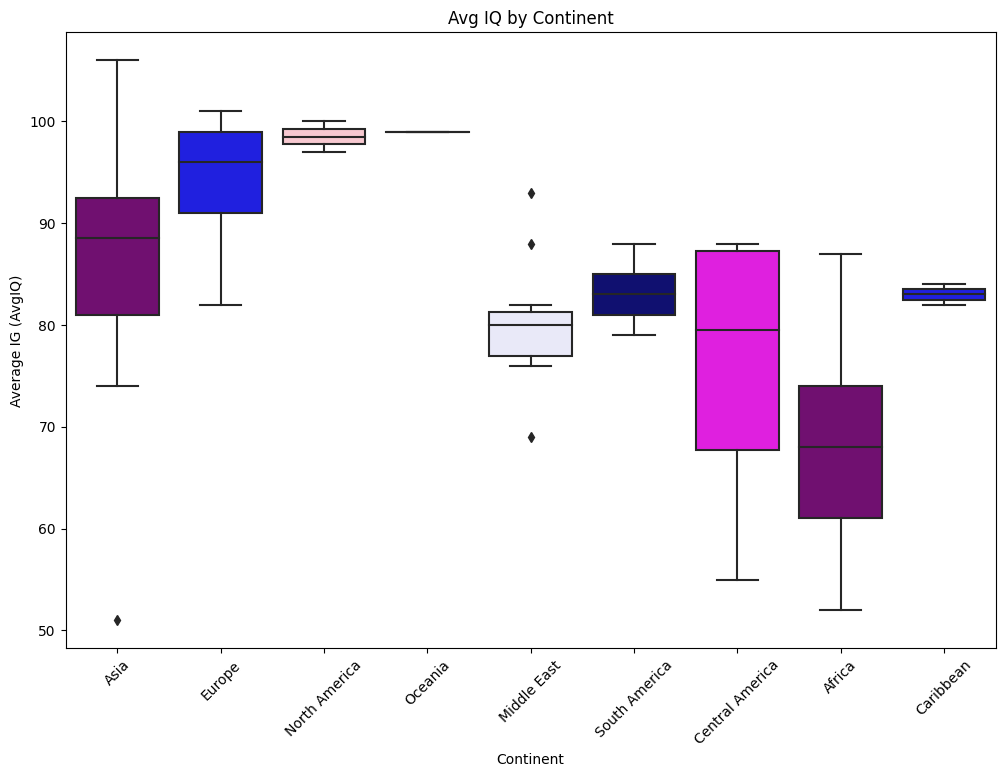

In [ ]:
# Define a custom color palette with matching or complementary colors to our presentation
custom_palette = sns.color_palette(['purple', 'blue', 'pink', 'navy', 'lavender', 'navy', 'magenta'])

# After defining each continent via country_to_continent
# create box plots
plt.figure(figsize=(12,8))
sns.boxplot(data=AvgIQ, x='Continent', y='IQ', palette=custom_palette)
plt.title('Avg IQ by Continent')
plt.xlabel('Continent')
plt.ylabel('Average IG (AvgIQ)')
plt.xticks(rotation=45) # to make labels more readable
plt.show()

Correlation between Education Expenditure and Average IQ

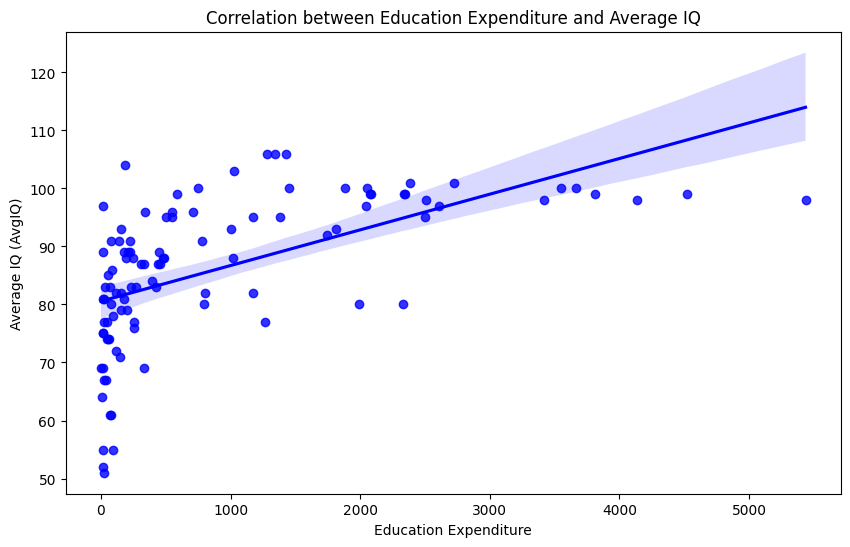

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=AvgIQ, x='education_expenditure', y='IQ', color='blue')
plt.title('Correlation between Education Expenditure and Average IQ')
plt.xlabel('Education Expenditure')
plt.ylabel('Average IQ (AvgIQ)')
plt.show()

Good, but, maybe some color?

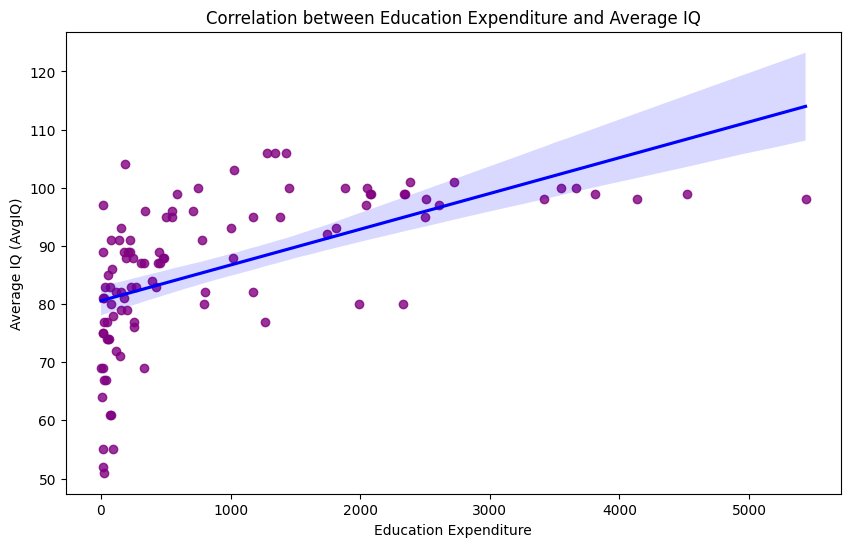

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette with blues, purples, and magentas
colors = sns.color_palette(['blue', 'purple', 'magenta'])

# Create a scatter plot with a regression line and color variation
plt.figure(figsize=(10, 6))
sns.regplot(data=AvgIQ, x='education_expenditure', y='IQ', color=colors[0], scatter_kws={'color': colors[1]})
plt.title('Correlation between Education Expenditure and Average IQ')
plt.xlabel('Education Expenditure')
plt.ylabel('Average IQ (AvgIQ)')
plt.show()

Trying to incorporate Avg Temperature on same visual.

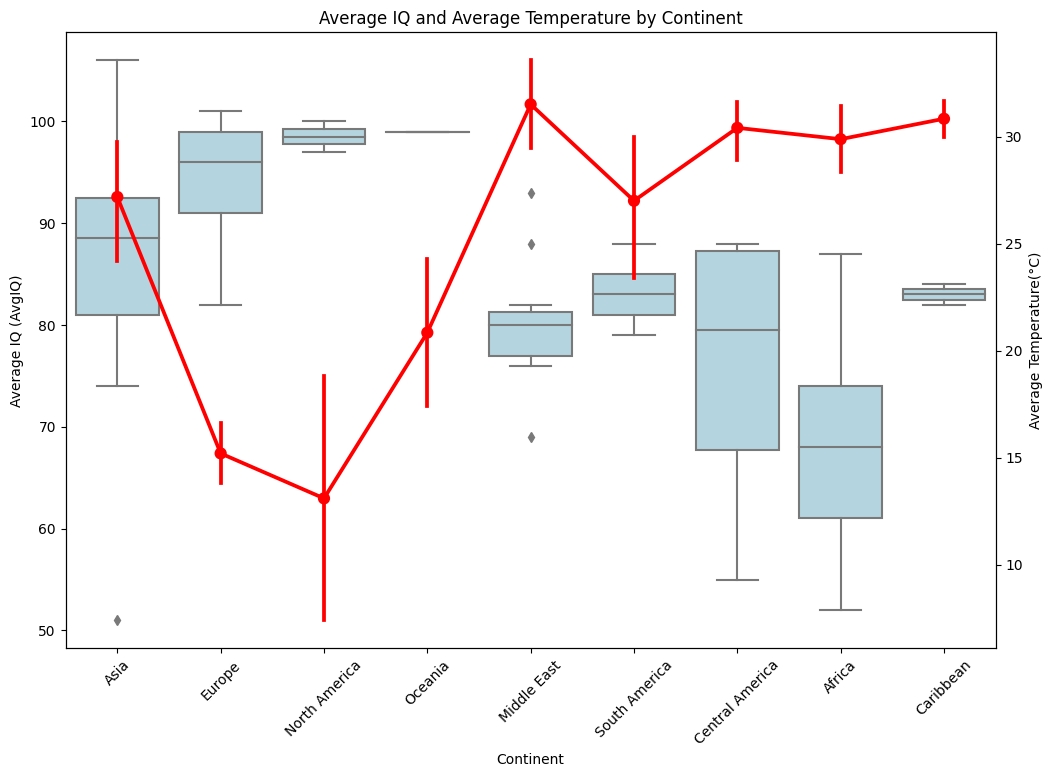

In [ ]:
import matplotlib.pyplot as plt

#create box plotfor AVg IQ
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=AvgIQ, x='Continent', y='IQ', color='lightblue')
ax.set_title('Average IQ and Average Temperature by Continent')
ax.set_xlabel('Continent')
ax.set_ylabel('Average IQ (AvgIQ)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


#Create a point plot for Average Temperature
ax2 = ax.twinx()
sns.pointplot(data=AvgIQ, x='Continent', y='avg_temp', color ='red', ax=ax2)
ax2.set_ylabel('Average Temperature(°C)')

plt.show()


Oh, thats kind of Ugly!


Trying pairplots from text, Storytelling with Data: A Data Visualization Guide

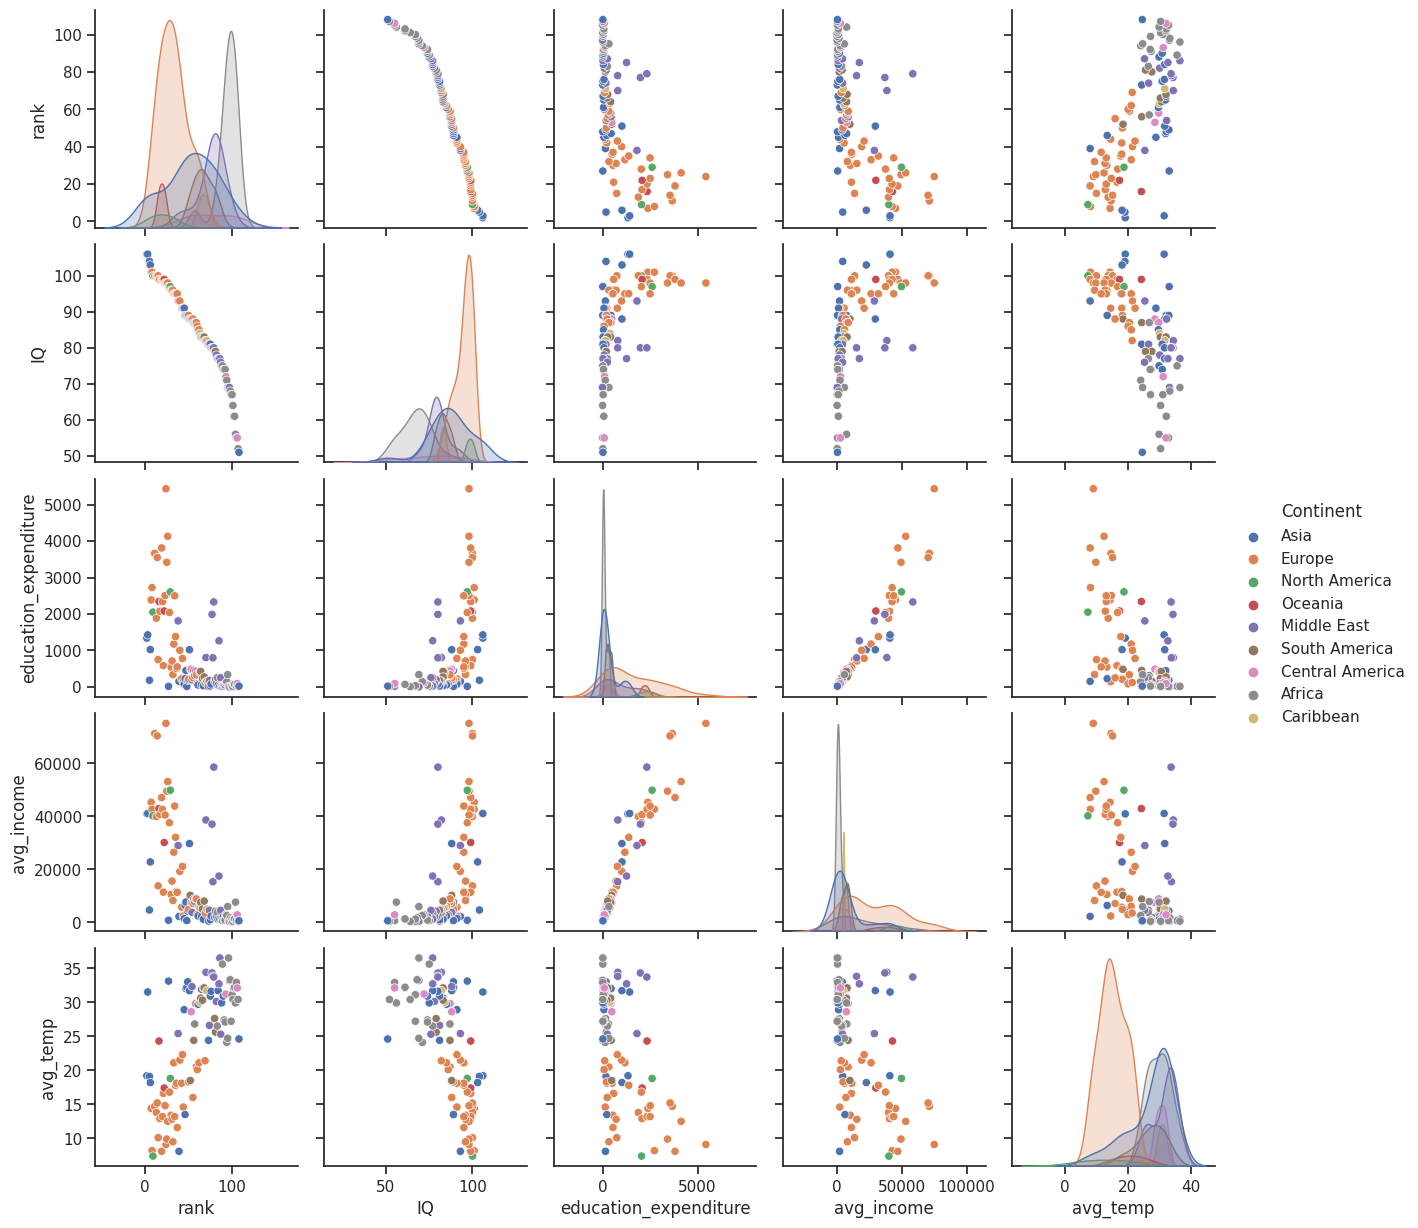

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot to visualize relationships between variables
sns.set(style="ticks")
sns.pairplot(data=AvgIQ, hue="Continent")
plt.show()

cute, but no. Although, it does appear to show there isn't a correlation with average temperature.

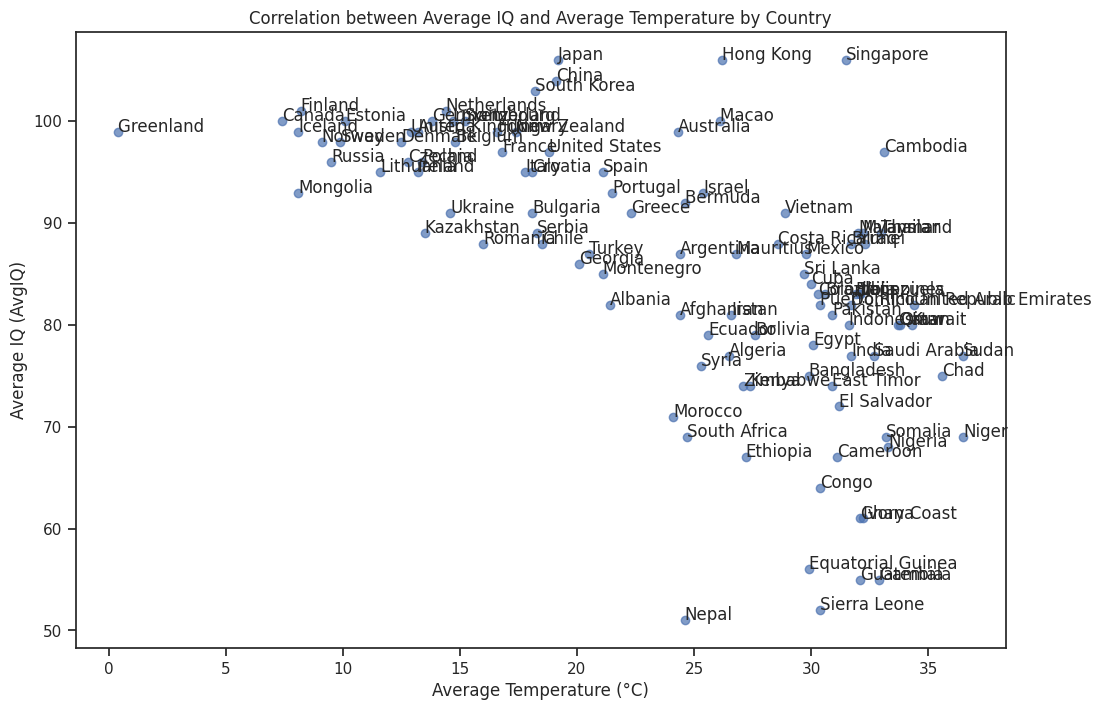

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Create a scatterplot with country labels
plt.figure(figsize=(12, 8))
plt.scatter(AvgIQ['avg_temp'], AvgIQ['IQ'], alpha=0.7)

# Add labels for each country
for i, country in enumerate(AvgIQ['country']):
    plt.annotate(country, (AvgIQ['avg_temp'].iloc[i], AvgIQ['IQ'].iloc[i]))

plt.title('Correlation between Average IQ and Average Temperature by Country')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average IQ (AvgIQ)')
plt.show()

Eh, that's too much, and less meaningful. Let's try labeling only certain countries.

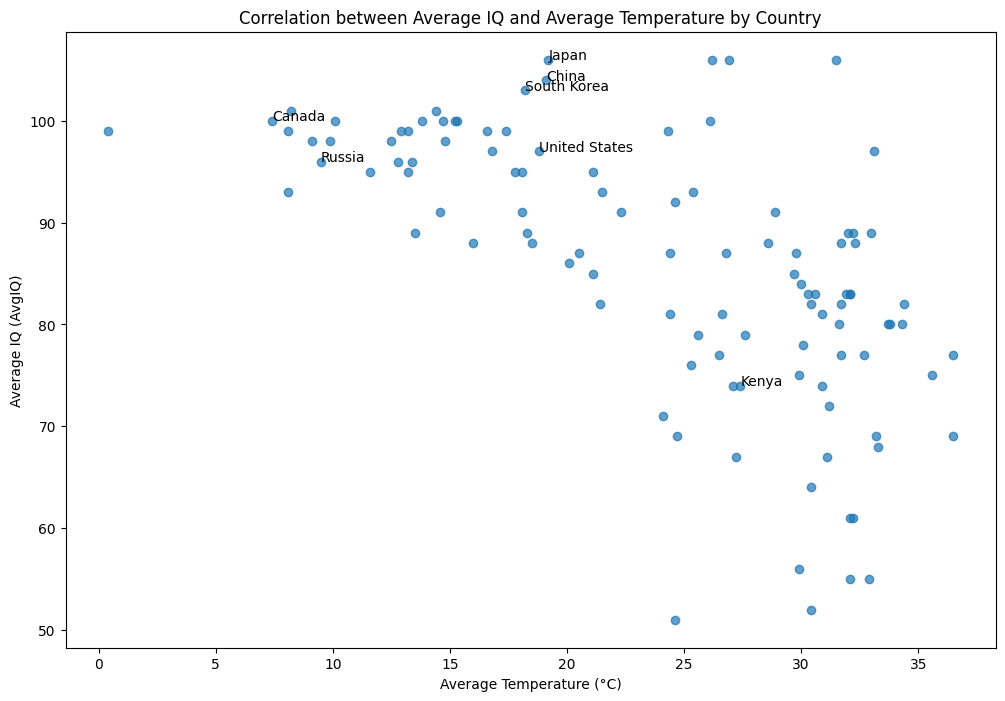

In [ ]:
import matplotlib.pyplot as plt

# List a few countries to label
countries_to_label = ['Japan', 'South Korea', 'Canada', 'China', 'United States', 'Russia', 'Kenya']

plt.figure(figsize=(12, 8))
plt.scatter(AvgIQ['avg_temp'], AvgIQ['IQ'], alpha=0.7)

for i, country in enumerate(AvgIQ['country']):
    if country in countries_to_label:
        plt.annotate(country, (AvgIQ['avg_temp'].iloc[i], AvgIQ['IQ'].iloc[i]))

plt.title('Correlation between Average IQ and Average Temperature by Country')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average IQ (AvgIQ)')
plt.show()

Maybe add variation to color to show temperature variance?

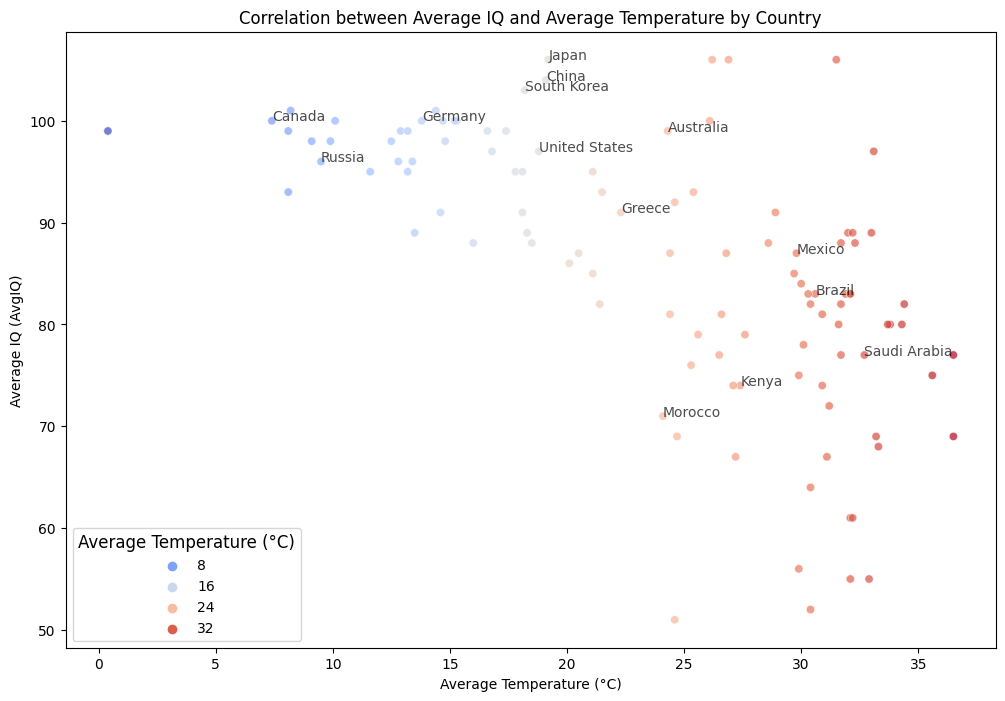

In [ ]:
# Labeling countries from different continents
countries_to_label = [
    'Japan', 'South Korea', 'Canada', 'China', 'United States', 'Russia',
    'Australia', 'Brazil', 'Greece', 'Kenya', 'Morocco', 'Saudi Arabia', 'Germany', 'Mexico'
]

# scatter plot with color gradient and labels
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=AvgIQ,
    x='avg_temp',
    y='IQ',
    hue='avg_temp',  #  temperature for color mapping
    palette='coolwarm',  #  color palette for temperature
    alpha=0.7,)


for i, country in enumerate(AvgIQ['country']):
    if country in countries_to_label:
        plt.annotate(country, (AvgIQ['avg_temp'].iloc[i], AvgIQ['IQ'].iloc[i]),
                     fontsize=10, alpha=0.7)

plt.title('Correlation between Average IQ and Average Temperature by Country')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average IQ (AvgIQ)')

# Customize the color legend
legend = plt.legend(title='Average Temperature (°C)')
legend.get_title().set_fontsize(12)

plt.show()

Copy and pasting data from Amy's Notebook....

([<matplotlib.axis.XTick at 0x788bd36d8eb0>,
 [Text(0, 0, '316.0'),
  Text(10, 0, '776.0'),
  Text(20, 0, '1289.0'),
  Text(30, 0, '2442.0'),
  Text(40, 0, '4532.0'),
  Text(50, 0, '6380.0'),
  Text(60, 0, '8840.0'),
  Text(70, 0, '16583.0'),
  Text(80, 0, '32104.0'),
  Text(90, 0, '41100.0'),
  Text(100, 0, '53149.0')])

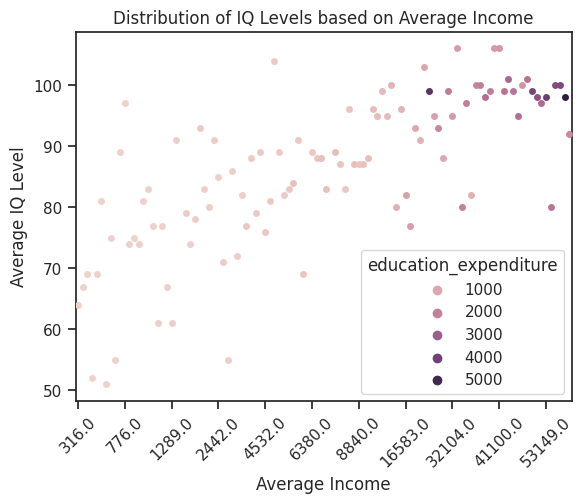

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

AvgIQ_sorted = AvgIQ.sort_values(by='avg_income')
sns.stripplot(data=AvgIQ_sorted, x='avg_income', y='IQ', hue='education_expenditure')
plt.xlabel('Average Income')
plt.ylabel('Average IQ Level')
plt.title('Distribution of IQ Levels based on Average Income')
plt.xticks(rotation=45)
plt.xticks(range(0, len(AvgIQ_sorted['avg_income']), 10), AvgIQ_sorted['avg_income'][::10])
